## Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Suppress Warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Shape

df.shape

(200, 5)

In [4]:
# Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Checking the null values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Checking Outlliers

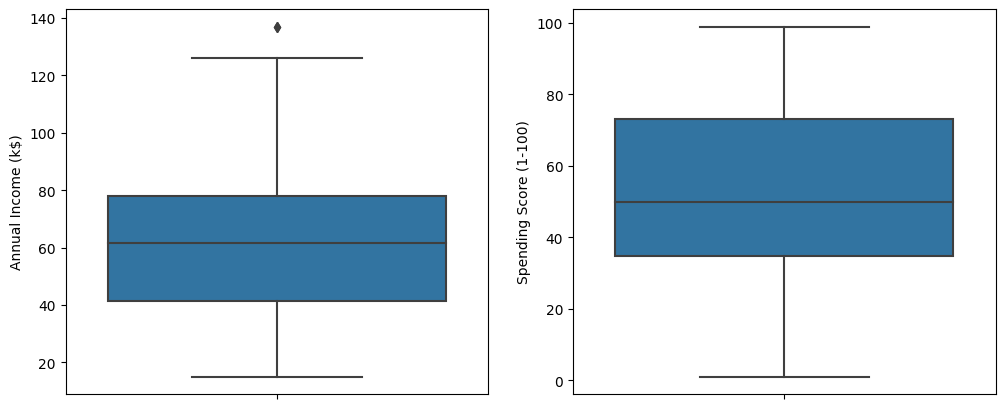

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, y="Annual Income (k$)")

plt.subplot(1,2,2)
sns.boxplot(data=df, y="Spending Score (1-100)");

## Exploratory Data Analysis

#### Univariate Analysis - Numerical Data Type

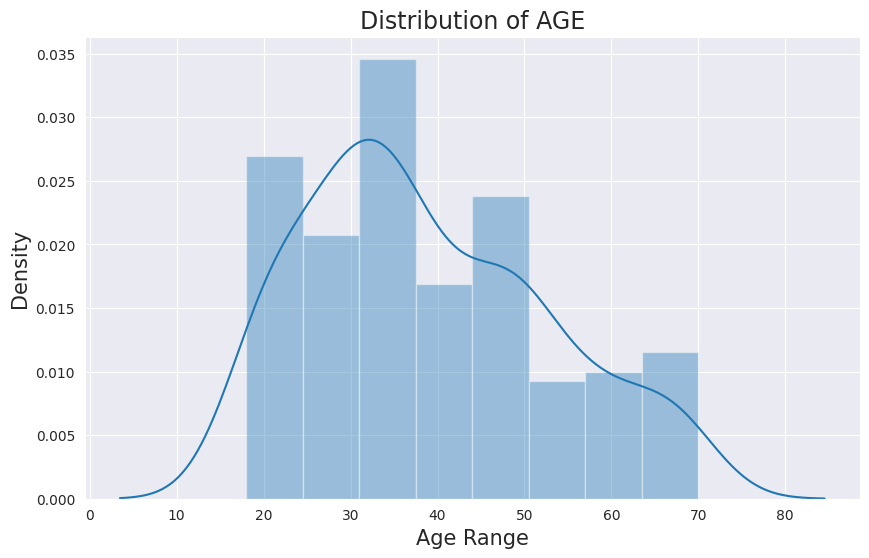

In [8]:
# Checking Age Distribution

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df.Age)
plt.title("Distribution of AGE", fontsize=17)
plt.xlabel("Age Range", fontsize=15)
plt.ylabel("Density", fontsize=15);

Conclusion: There are customers of wide variety of ages

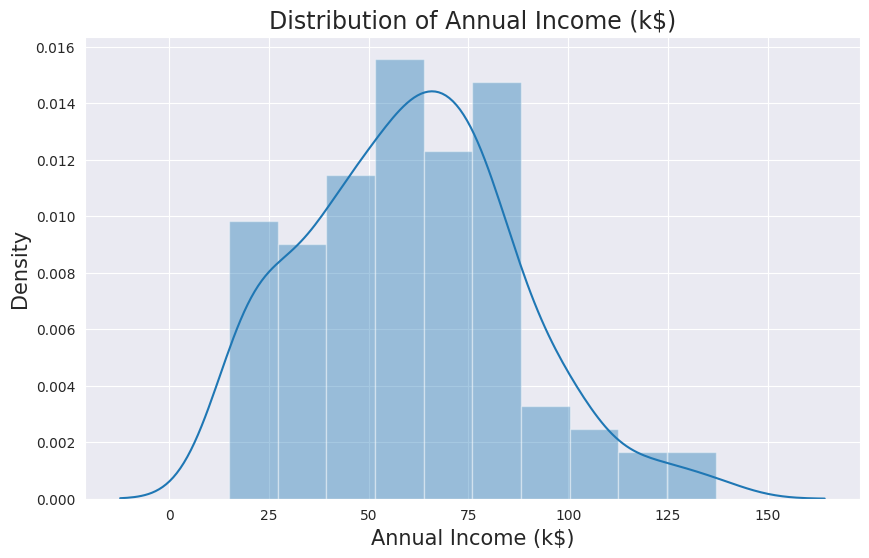

In [9]:
# Annual Income (k$) Distribution

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df["Annual Income (k$)"])
plt.title("Distribution of Annual Income (k$)", fontsize=17)
plt.xlabel("Annual Income (k$)", fontsize=15)
plt.ylabel("Density", fontsize=15);

Conclusion: Most of the annual income falls between 50K to 85K.

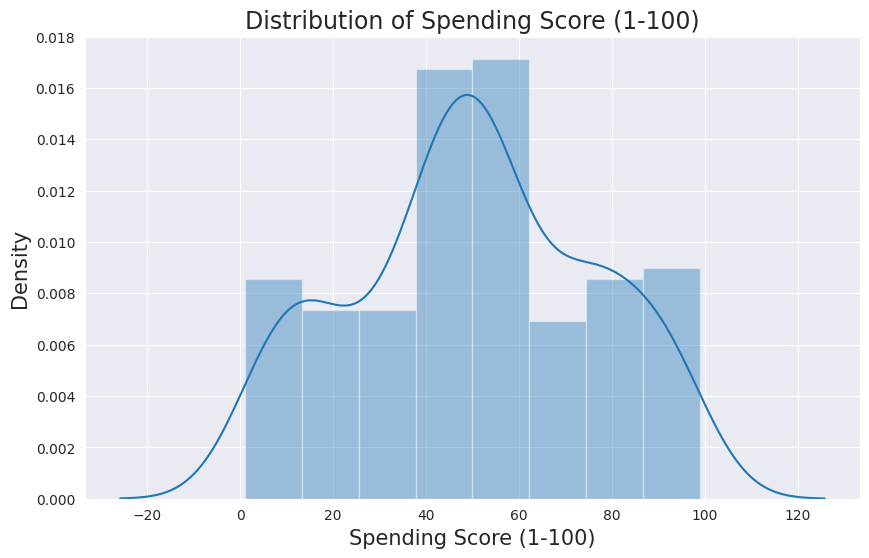

In [10]:
# Spending Score (1-100) Distribution

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(df["Spending Score (1-100)"])
plt.title("Distribution of Spending Score (1-100)", fontsize=17)
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

Conclusion: Most of the customers got the score ranging between 40 to 60

#### Univariate Analysis - Categorical Data Type

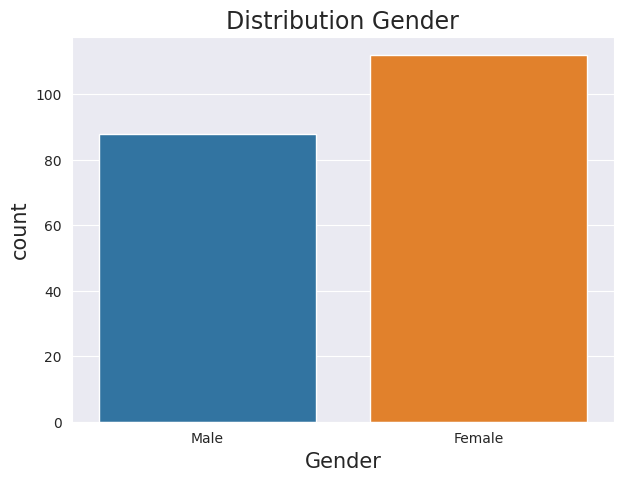

In [11]:
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')

plt.title("Distribution Gender", fontsize=17)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Count", fontsize=15)
sns.countplot(df, x="Gender");

Conclusion - Female customers are more as compared to the male customers

#### Bivariate Analysis - Numerical-Numerical Data Type

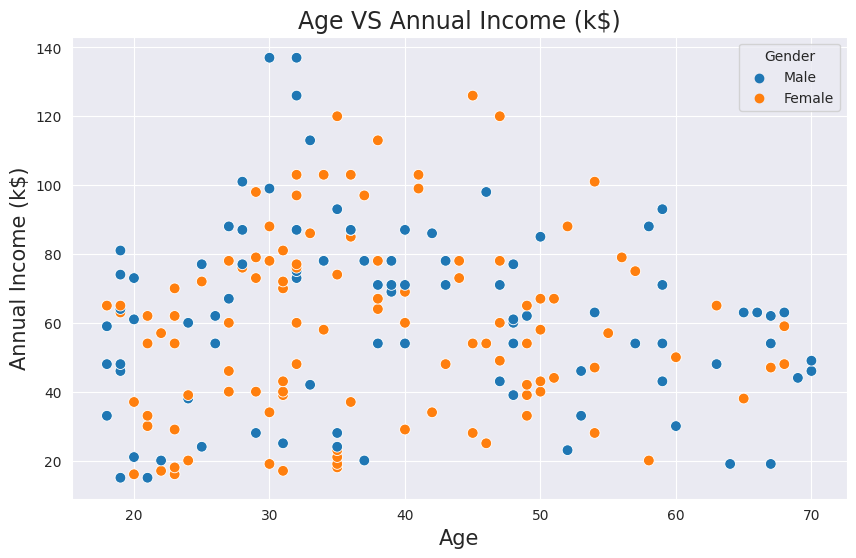

In [12]:
# Age VS Anual Income

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Age", y= "Annual Income (k$)", hue="Gender", s=60)
plt.title("Age VS Annual Income (k$)", fontsize=17)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15);

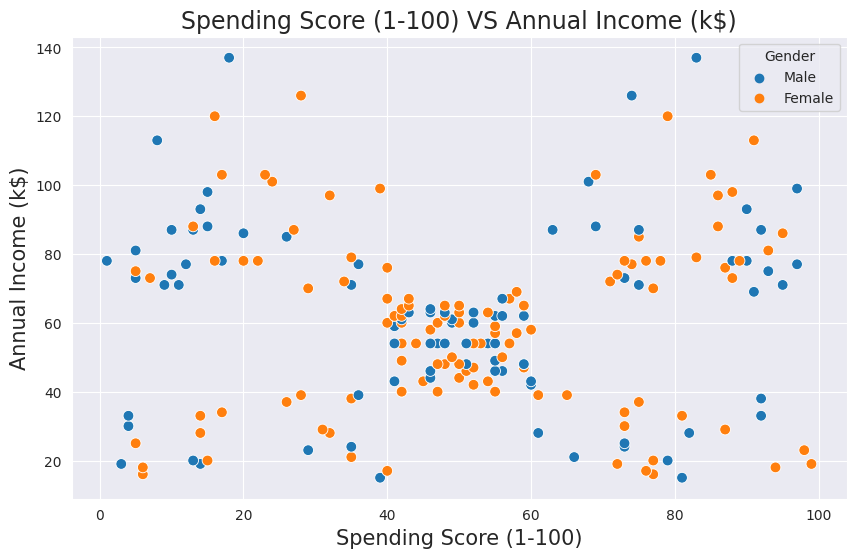

In [13]:
# Age VS Anual Income

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Spending Score (1-100)", y= "Annual Income (k$)", hue="Gender", s=60)
plt.title("Spending Score (1-100) VS Annual Income (k$)", fontsize=17)
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15);

#### Binning - Age, Income and Spending Score

In [14]:
# Age -

Age_18_25 = df.Age[(df.Age>=18) & (df.Age<=25)]
Age_26_35 = df.Age[(df.Age>=26) & (df.Age<=35)]
Age_36_45 = df.Age[(df.Age>=36) & (df.Age<=45)]
Age_46_55 = df.Age[(df.Age>=46) & (df.Age<=55)]
Age_55_Above = df.Age[(df.Age>=56)]

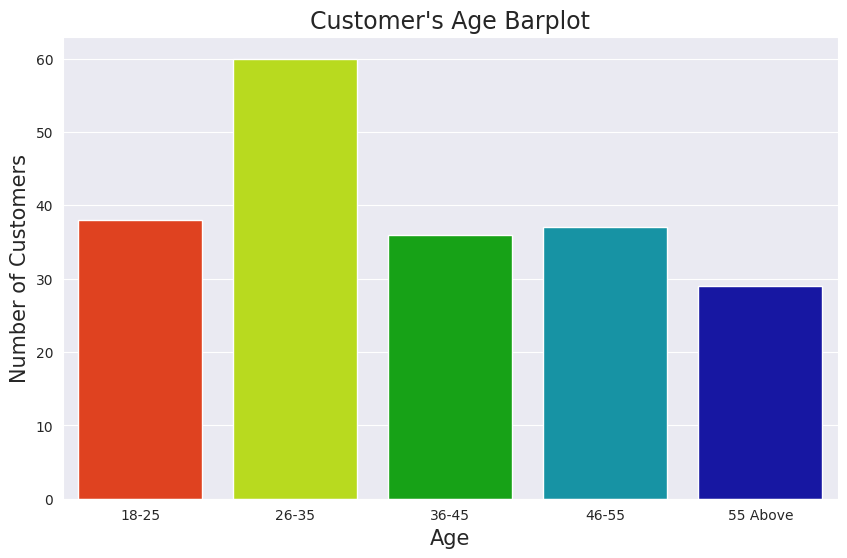

In [15]:
x = ["18-25","26-35","36-45","46-55","55 Above"]
y = [len(Age_18_25.values),len(Age_26_35.values),len(Age_36_45.values),len(Age_46_55.values),len(Age_55_Above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Customer's Age Barplot", fontsize=17)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15);

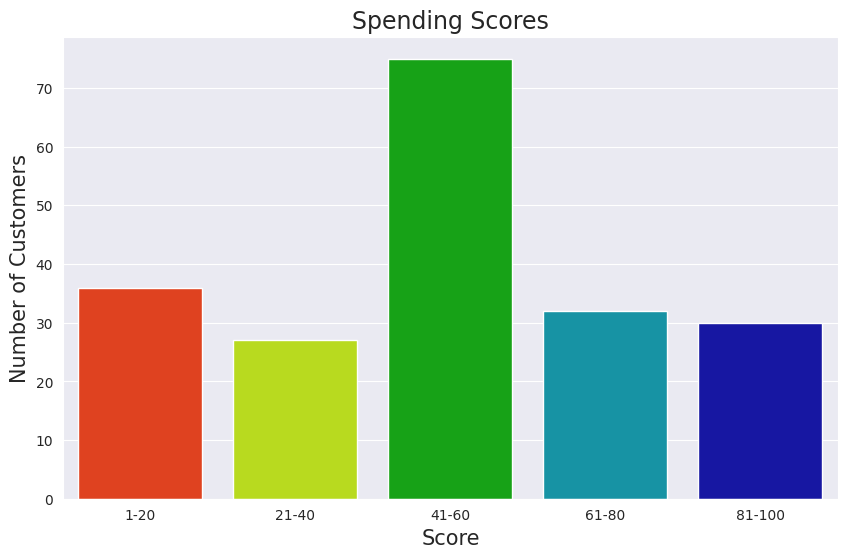

In [16]:
# Spending Score -

ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score_x, y=score_y,palette="nipy_spectral_r")
plt.title("Spending Scores", fontsize=17)
plt.xlabel("Score", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15);

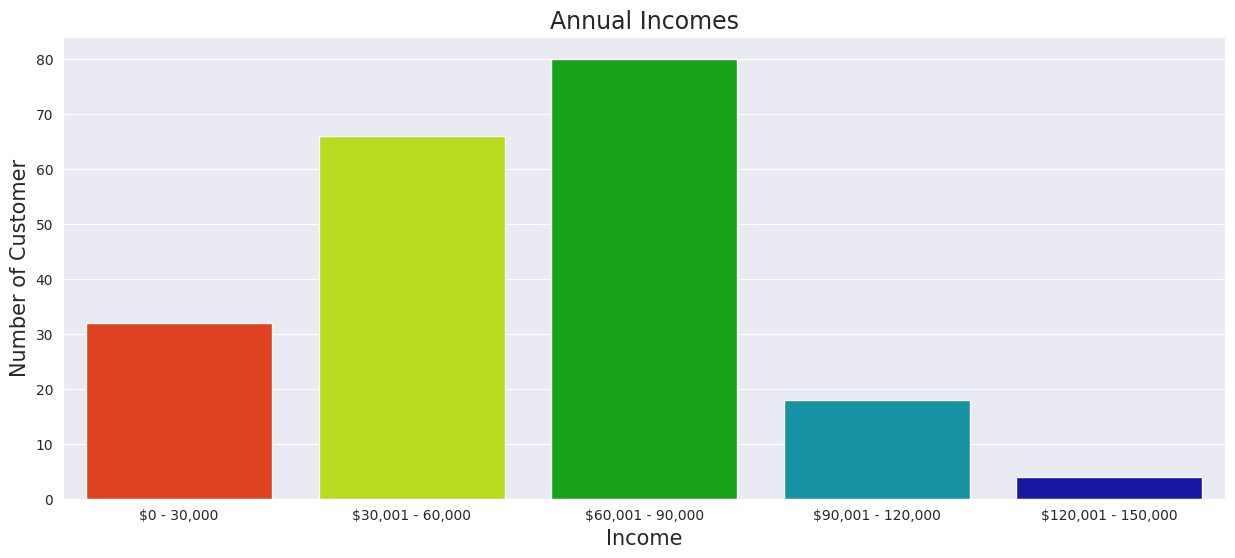

In [17]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

income_x = ["$0 - 30,000", "$30,001 - 60,000", "$60,001 - 90,000", "$90,001 - 120,000", "$120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes", fontsize=17)
plt.xlabel("Income", fontsize=15)
plt.ylabel("Number of Customer", fontsize=15);

## One Hot Encoding

We need to convert Gender to numeric data type so we can use it in Kmeans model.

In [18]:
df.replace(['Female', 'Male'], [0, 1], inplace=True)

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [20]:
df.info() # int data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


## Rescaling

In [21]:
df_scaled = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Class instance
scaler = StandardScaler()

# Fit_transform
df_scaled_fit = scaler.fit_transform(df_scaled)

In [22]:
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = ["Gender", "Age","Annual Income (k$)","Spending Score (1-100)"]
df_scaled_fit.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


## Model Building

We should pick the high-variance features. Notice that Annual Income, Spending Score and Age have significantly higher variances than the Gender. We're going to pick them.

In [23]:
df.var()

CustomerID                3350.000000
Gender                       0.247638
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

In [24]:
var_list = df_scaled_fit[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

We need to tune the k hyperparameter.

In [25]:
# Calculating sum of squared distance

ssd = []

for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(var_list)

    ssd.append(kmeans.inertia_)

#### Elbow Curve

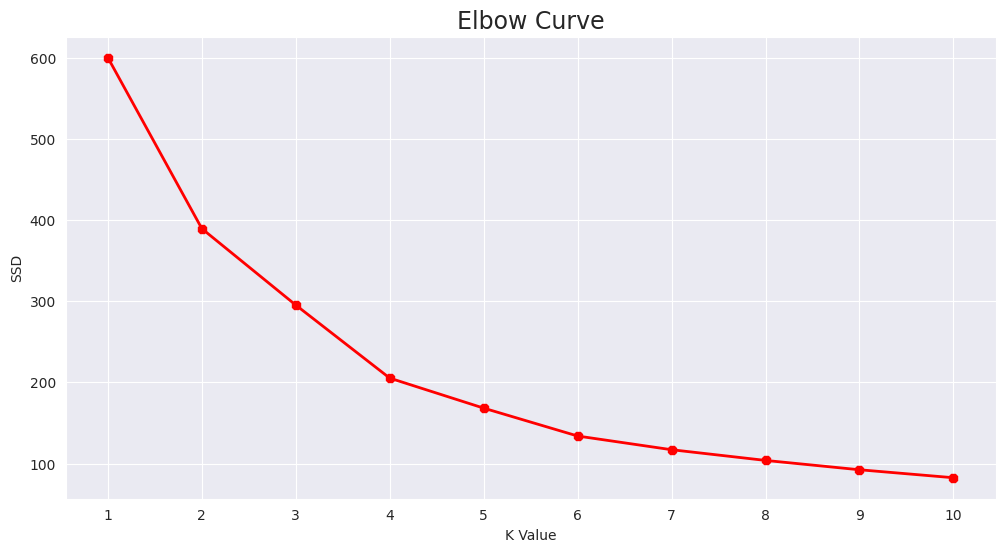

In [26]:
plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve", fontsize=17)
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD");

Conclusion: From the above Elbow curve we will take the value of K=4 and rebuild the cluster.

In [27]:
# K=4

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=4)

In [28]:
df["Label"] = kmeans.labels_

In [29]:
var_list["Label"] = kmeans.labels_

In [30]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,3
3,4,0,23,16,77,3
4,5,0,31,17,40,3


In [31]:
from mpl_toolkits.mplot3d import Axes3D

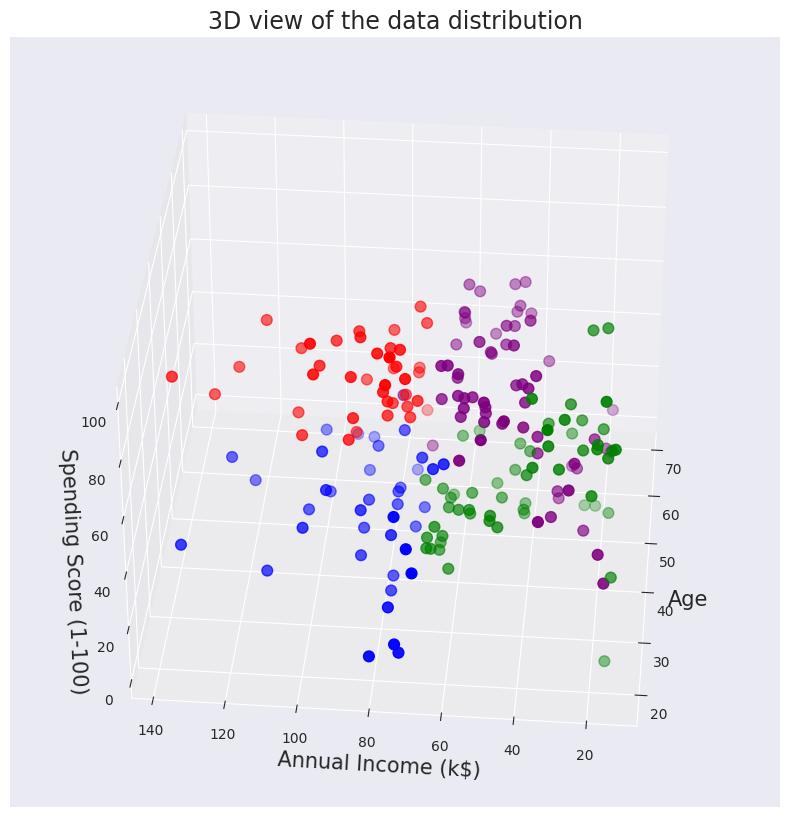

In [32]:
#3D Plot

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Label == 0], df["Annual Income (k$)"][df.Label == 0], df["Spending Score (1-100)"][df.Label == 0], c='purple', s=60)
ax.scatter(df.Age[df.Label == 1], df["Annual Income (k$)"][df.Label == 1], df["Spending Score (1-100)"][df.Label == 1], c='red', s=60)
ax.scatter(df.Age[df.Label == 2], df["Annual Income (k$)"][df.Label == 2], df["Spending Score (1-100)"][df.Label == 2], c='blue', s=60)
ax.scatter(df.Age[df.Label == 3], df["Annual Income (k$)"][df.Label == 3], df["Spending Score (1-100)"][df.Label == 3], c='green', s=60)

ax.view_init(35, 185)

plt.title("3D view of the data distribution", fontsize=17)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
ax.set_zlabel('Spending Score (1-100)', fontsize=15);

From the above we can see that the data has been clustered into 4 different parts.

In [33]:
# Printing the customerID according to the groups.

cust1 = df[df.Label==0]
print("The number of customers in 1st group = ", len(cust1))
print("The Customer Ids are - ", cust1.CustomerID.values)
print("============================================================================================\n")

cust2 = df[df.Label==1]
print("The number of customers in 2nd group = ", len(cust2))
print("The Customer Ids are - ", cust2.CustomerID.values)
print("============================================================================================\n")

cust3 = df[df.Label==2]
print("The number of customers in 3rd group = ", len(cust3))
print("The Customer Ids are - ", cust3.CustomerID.values)
print("============================================================================================\n")

cust4 = df[df.Label==3]
print("The number of customers in 4th group = ", len(cust4))
print("The Customer Ids are - ", cust4.CustomerID.values)
print("============================================================================================\n")

The number of customers in 1st group =  65
The Customer Ids are -  [  7   9  11  13  15  19  23  25  27  29  31  33  35  37  39  41  43  45
  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73  74
  75  77  78  80  81  83  84  86  87  90  91  93  94  97  99 102 103 105
 107 108 109 110 111 117 118 119 120 129 161]

The number of customers in 2nd group =  40
The Customer Ids are -  [123 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156
 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192
 194 196 198 200]

The number of customers in 3rd group =  38
The Customer Ids are -  [113 122 125 127 131 133 135 137 139 141 143 145 147 149 151 153 155 157
 159 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195
 197 199]

The number of customers in 4th group =  57
The Customer Ids are -  [  1   2   3   4   5   6   8  10  12  14  16  17  18  20  21  22  24  26
  28  30  32  34  36  38  40  42  44  46  48  49  50  52  53  59  62  6

## Deployment on Interactive Dashboard

In [34]:
!pip install dash

In [35]:
!pip install jupyter_dash

In [36]:
import plotly.express as px
from dash import Input, Output, dcc, html
from jupyter_dash import JupyterDash
from sklearn.metrics import silhouette_score

JupyterDash.infer_jupyter_proxy_config()

## Application Layout

In [37]:
app = JupyterDash(__name__)

## K-means Slider and Metrics
A get_model_metrics function that builds, trains, and evaluates KMeans model.

In [38]:
def get_model_metrics(k=2, return_metrics=False):

    """Builds ``KMeans`` model.

    Parameters
    ----------

    k : int, default=2
        Number of clusters.

    return_metrics : bool, default=False
        If ``False`` returns ``KMeans`` model. If ``True`` returns ``dict``
        with inertia, silhouette score and customers IDs.

    """

    model = KMeans(n_clusters=k, random_state=42)
    model.fit(var_list)

    if return_metrics:
        i=model.inertia_
        ss=silhouette_score(var_list, model.labels_)


        metrics={
            'inertia': round(i),
            'silhouette': round(ss, 3)
        }

        for i in range(1, k+1):
            cust = df[df.Label==i-1]
            metrics[f'The number of customers in group {i}'] = len(cust)
            metrics[f'The Customer IDs in group {i} are'] = cust.CustomerID.values

        return metrics

    return model

In [39]:
get_model_metrics(return_metrics=True)

{'inertia': 542,
 'silhouette': 0.388,
 'The number of customers in group 1': 65,
 'The Customer IDs in group 1 are': array([  7,   9,  11,  13,  15,  19,  23,  25,  27,  29,  31,  33,  35,
         37,  39,  41,  43,  45,  47,  51,  54,  55,  56,  57,  58,  60,
         61,  63,  64,  65,  67,  68,  71,  72,  73,  74,  75,  77,  78,
         80,  81,  83,  84,  86,  87,  90,  91,  93,  94,  97,  99, 102,
        103, 105, 107, 108, 109, 110, 111, 117, 118, 119, 120, 129, 161]),
 'The number of customers in group 2': 40,
 'The Customer IDs in group 2 are': array([123, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146,
        148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172,
        174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198,
        200])}

In [40]:
@app.callback(
    Output('metrics', 'children'),
    Input('k-slider', 'value')
)
def serve_metrics(k=2):

    """Returns list of ``H3`` elements containing inertia and silhouette score
    for ``KMeans`` model.

    Parameters
    ----------

    k : int, default=2
        Number of clusters.
    """

    metrics = get_model_metrics(k=k, return_metrics=True)
    text=[
        html.H3(f"Inertia: {metrics['inertia']}"),
        html.H3(f"Silhouette Score: {metrics['silhouette']}")
    ]

    for i in range(1, k+1):
        text.append(html.H3(f'The number of customers in group {i}: f"{metrics[f"The number of customers in group {i}"]}"'))
        text.append(html.H3(f'The Customer IDs in group {i} are: f"{metrics[f"The Customer IDs in group {i} are"]}"'))

    return text

In [41]:
serve_metrics()

[H3('Inertia: 542'),
 H3('Silhouette Score: 0.388'),
 H3('The number of customers in group 1: f"65"'),
 H3('The Customer IDs in group 1 are: f"[  7   9  11  13  15  19  23  25  27  29  31  33  35  37  39  41  43  45\n  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73  74\n  75  77  78  80  81  83  84  86  87  90  91  93  94  97  99 102 103 105\n 107 108 109 110 111 117 118 119 120 129 161]"'),
 H3('The number of customers in group 2: f"40"'),
 H3('The Customer IDs in group 2 are: f"[123 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156\n 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192\n 194 196 198 200]"')]

In [42]:
@app.callback(
    Output('3d-scatter', 'figure'),
    Input('k-slider', 'value')
)
def serve_scatter_plot(k=2):

    """Build 3D scatter plot of ``df`` with ``KMeans`` labels.

    Parameters
    ----------

    k : int, default=2
        Number of clusters.
    """

    model = get_model_metrics(k=k, return_metrics=False)
    var_list['Label'] =model.labels_

    fig=px.scatter_3d(data_frame=var_list,
                   x='Age',
                   y='Annual Income (k$)',
                   z='Spending Score (1-100)',
                   color='Label',
                   title='3D Representation of Clusters')

    return fig

In [43]:
app.layout = html.Div(
    [
        html.H1('Customer Segmentation'),
        html.H3('K-means Clusetring'),
        html.H4('Number of Clusters (k)'),
        dcc.Slider(min=2, max=12, step=1, value=2, id='k-slider'),
        html.Div(id='metrics'),
        dcc.Graph(figure=serve_scatter_plot(), id='3d-scatter')
    ]
)

## Application Deployment


## To use the dashboard you should run the last cell. It will look like this:
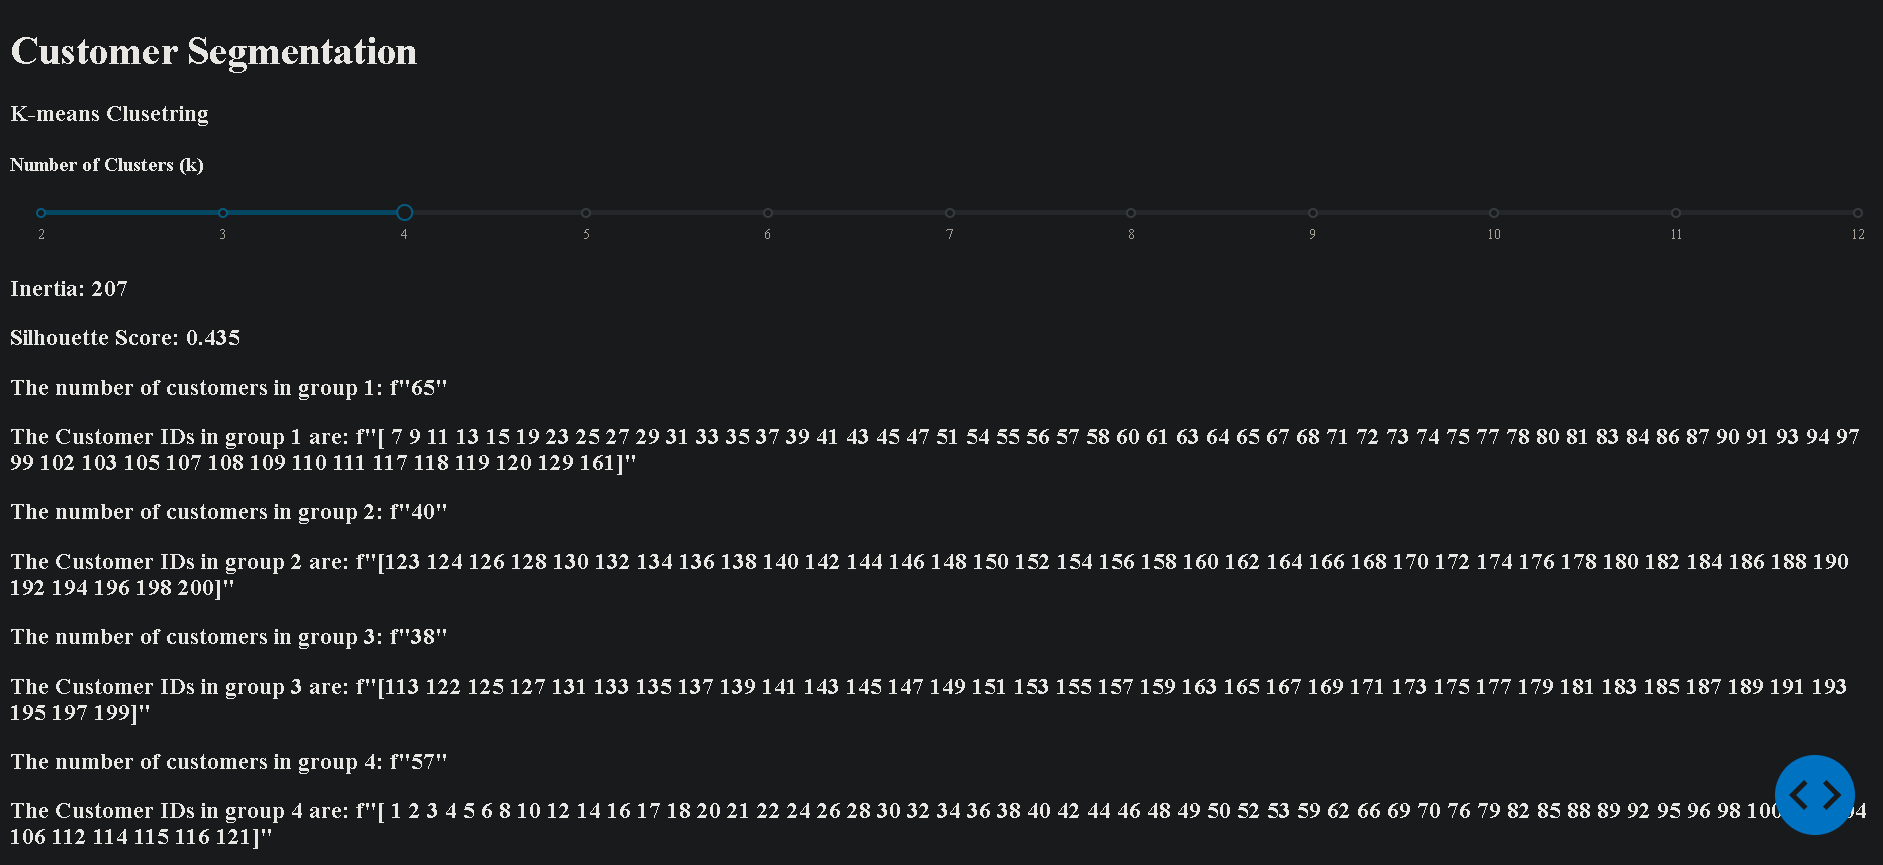

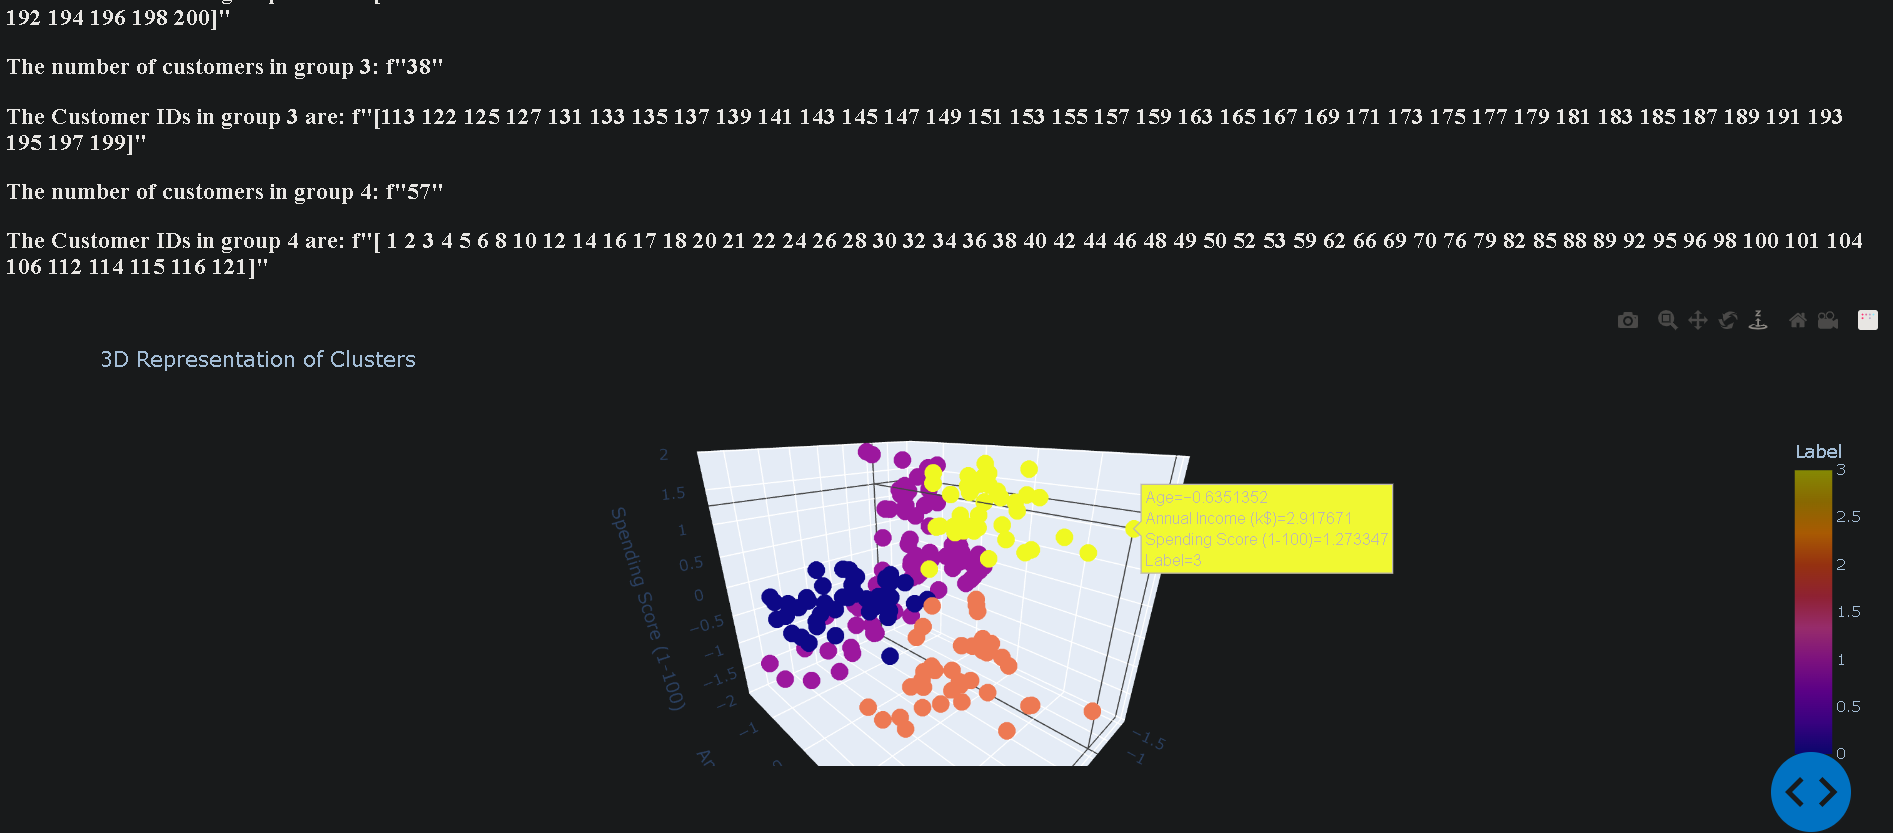

In [44]:
app.run_server(host="0.0.0.0", mode="external")

Dash app running on:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>